ModuleNotFoundError: No module named 'imagehash'

In [1]:
from PIL import Image
import numpy as np

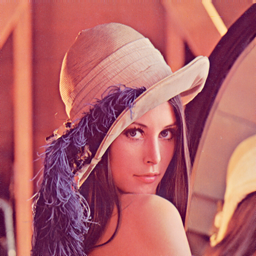

In [2]:
img = Image.open("Lenna.bmp")
img

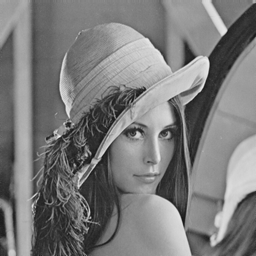

In [3]:
gray_img = img.convert('L')
gray_img   #グレースケールに変換

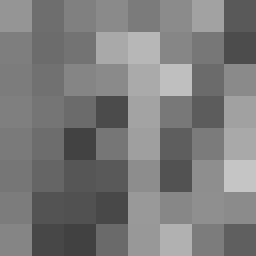

In [4]:
small_gray_img = gray_img.resize([8, 8], Image.ANTIALIAS)
small_gray_img.resize([256, 256])      #9×8に縮小

In [5]:
mean_gray_val = np.mean(np.asarray(small_gray_img).flatten())
mean_gray_val

123.640625

In [6]:
tester = lambda p: 1 if p > mean_gray_val else 0
vfunc = np.vectorize(tester)
phash_array = vfunc(small_gray_img)
phash_array #自分の一つ右隣のピクセルと値を比較し、右隣より小さければ「1」同じか大きければ「0」をセットする。

array([[1, 0, 1, 1, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 1, 1, 0]])

In [7]:
def to_hex(hash_array):
    hex_str = ''
    for array in hash_array:
        hash_val = int("".join(str(val) for val in array), 2)
        hex_str += hex(hash_val)[2:].rjust(2, '0')
    return hex_str #1ピクセルの結果を1bitとし、64ピクセルの結果を結合して64bitの整数を算出する。

In [8]:
to_hex(phash_array)

'b69cbd89090b8f8e'

In [9]:
def ahash(path): 
    img = Image.open(path)
    gray_img = img.convert('L')
    small_gray_img = gray_img.resize([8, 8], Image.ANTIALIAS)
    mean_gray_val = np.mean(np.asarray(small_gray_img).flatten())
    
    tester = lambda p: 1 if p > mean_gray_val else 0
    vfunc = np.vectorize(tester)
    return vfunc(small_gray_img) 

In [11]:
a = ahash("/home/nakataniken/ダウンロード/Aerial.bmp")

In [12]:
a

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0]])

In [13]:
np.savetxt('Aerialハッシュ値.csv',a)

In [19]:
to_hex(ahash('Lenna.bmp'))

'b69cbd89090b8f8e'

In [26]:
def phash(image, hash_size=32):
        image = image.convert("L").resize((hash_size, hash_size), Image.ANTIALIAS)
        pixels = numpy.array(image.getdata(), dtype=numpy.float).reshape((hash_size, hash_size))
        dct = scipy.fftpack.dct(pixels)
        dctlowfreq = dct[:8, 1:9]
        avg = dctlowfreq.mean()
        diff = dctlowfreq > avg
        return ImageHash(diff)

In [27]:
def dhash(image, hash_size=8):
        image = image.convert("L").resize((hash_size + 1, hash_size), Image.ANTIALIAS)
        pixels = numpy.array(image.getdata(), dtype=numpy.float).reshape((hash_size + 1, hash_size))
        # compute differences
        diff = pixels[1:,:] > pixels[:-1,:]
        return ImageHash(diff)

In [28]:
phash("Lenna.bmp")

AttributeError: 'str' object has no attribute 'convert'